In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB as nbc
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import (train_test_split, learning_curve, cross_val_score, cross_val_predict, 
ShuffleSplit, KFold, cross_validate)
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv("Datasets/D1.csv")
print("shape of the dataset", df.shape)

shape of the dataset (17499, 355)


In [3]:
def get_dataset():
    X = df.iloc[:, :-1]
    y = df.iloc[: , -1]
    return X, y

X,y=get_dataset()
# X_norm=normalize(X)

In [11]:
lda = LDA(n_components=20)
Xt=lda.fit(X,y).transform(X)
lda.explained_variance_ratio_

array([0.20151934, 0.17718954, 0.1445673 , 0.10780274, 0.07735086,
       0.0400397 , 0.02508081, 0.02230583, 0.0198986 , 0.01704163,
       0.01529339, 0.0127588 , 0.00882826, 0.00732154, 0.00595658,
       0.00521021, 0.00492452, 0.00451879, 0.00438933, 0.00402131])

In [9]:
print(Xt.shape)

(17499, 50)


In [12]:
def get_model():
    models = list()
    models.append(nbc())
#     models.append(make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear')))
    #models.append(DT())
    return models
 
def evaluate_model(cv, model):
    #X, y = get_dataset()  # get the dataset
#     model = get_model()  # get the model
    scoring = {'accuracy': make_scorer(accuracy_score),
               'f1_score': make_scorer(f1_score, average='weighted')}
    # evaluate the model
    scores = cross_validate(model, Xt, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

# define folds to test
folds = range(2, 12)
models = get_model()  # get the model
accList, fscoreList = list(), list()

for model in models:
    print("Results for model = ", model)
    for k in folds:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
        score = evaluate_model(cv, model)
        accuracy = np.mean(score['test_accuracy'])
        accList.append(accuracy)
        f1 = np.mean(score['test_f1_score'])
        fscoreList.append(f1)
        print('> folds=', k-1, ', accuracy =', round(accuracy,3), ', F1_score =', round(f1,3))

Results for model =  GaussianNB()
> folds= 1 , accuracy = 0.44 , F1_score = 0.447
> folds= 2 , accuracy = 0.442 , F1_score = 0.449
> folds= 3 , accuracy = 0.442 , F1_score = 0.449
> folds= 4 , accuracy = 0.442 , F1_score = 0.449
> folds= 5 , accuracy = 0.442 , F1_score = 0.448
> folds= 6 , accuracy = 0.441 , F1_score = 0.448
> folds= 7 , accuracy = 0.443 , F1_score = 0.449
> folds= 8 , accuracy = 0.442 , F1_score = 0.448
> folds= 9 , accuracy = 0.443 , F1_score = 0.449
> folds= 10 , accuracy = 0.443 , F1_score = 0.449


In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(accuracy,k-1)

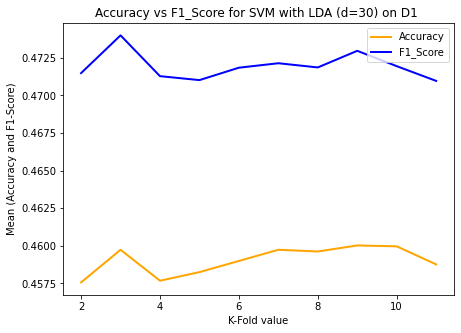

In [7]:
fig, ax = pyplot.subplots(figsize=(7,5))

ax.plot(folds, accList, color='orange', label="Accuracy", linewidth=2)
ax.plot(folds, fscoreList, color='blue', label="F1_Score", linewidth=2)
# ax.set_ylim(ymin=.3, ymax=.5)
ax.set_title('Accuracy vs F1_Score for SVM with LDA (d=30) on D1 ')
ax.set_xlabel('K-Fold value')
ax.set_ylabel('Mean (Accuracy and F1-Score)')
ax.legend(loc="upper right")

# show the plot
pyplot.show()